# Ant Colony Optimization - Travelling Salesman Problem

## Preparing Data

In [27]:
%matplotlib inline
import numpy as np
import pandas
import matplotlib.pyplot as plt

In [26]:
post_off_data = pandas.read_csv("data.csv")
space = np.array([post_off_data.values[:, 6], post_off_data.values[:, 7]], dtype=np.float_)
space = np.swapaxes(space, 0, 1)

## Algorithm

In [28]:
def init_ants(space, colony):
    init_pos = np.random.randint(space.shape[0], size=colony)
    return init_pos

In [29]:
def find_inv_distance(space, beta):
    distances = np.zeros((space.shape[0], space.shape[0]))
    for index, point in enumerate(space):
        distances[index] = np.sqrt(((space - point) ** 2).sum(axis=1))
    with np.errstate(all='ignore'):
        inv_distance =  1 / distances
    inv_distance[inv_distance == np.inf] = 0
    return inv_distance ** beta

In [30]:
def ants_move(space, pos, inv_distance, pheromones, alpha, beta, del_tau):
    paths = np.zeros((space.shape[0], pos.shape[0]), dtype=int) - 1
    paths[0] = pos
    for node in range(1, space.shape[0]):
        for ant in range(pos.shape[0]):
            next_loc_prob = (inv_distance[pos[ant]] ** alpha + pheromones[pos[ant]] ** beta / 
                                inv_distance[pos[ant]].sum() ** alpha + pheromones[pos[ant]].sum() ** beta)
            next_pos = np.argwhere(next_loc_prob == np.amax(next_loc_prob))[0][0]
            while next_pos in paths[:, ant]:
                next_loc_prob[next_pos] = 0.0
                next_pos = np.argwhere(next_loc_prob == np.amax(next_loc_prob))[0][0]
            paths[node, ant] = next_pos
            pheromones[node, next_pos] = pheromones[node, next_pos] + del_tau
    return np.swapaxes(paths, 0, 1)

In [31]:
def aco(space, iters=50, colony=25, alpha=1.0, beta=1.0, del_tau=0.5, rho=0.5):
    inv_distance = find_inv_distance(space, beta)
    pheromones = np.zeros((space.shape[0], space.shape[0]))
    min_distance = None
    min_path = None
    for i in range(iters):
        init_pos = init_ants(space, colony)
        paths = ants_move(space, init_pos, inv_distance, pheromones, alpha, beta, del_tau)
        pheromones *= (1 - rho)
        for path in paths:
            distance = 0
            for node in range(1, path.shape[0]):
                distance += np.sqrt(((space[int(path[node])] - space[int(path[node-1])]) ** 2).sum())
            if not min_distance or distance < min_distance:
                min_distance = distance
                min_path = path
    min_path = np.append(min_path, min_path[0])
    return (min_path, min_distance)

In [32]:
min_path, min_distance = aco(space, 100, 30, 1, 0.5, 1, 0.5)

KeyboardInterrupt: KeyboardInterrupt: 

Minimum distance is: 3.2570447420604483


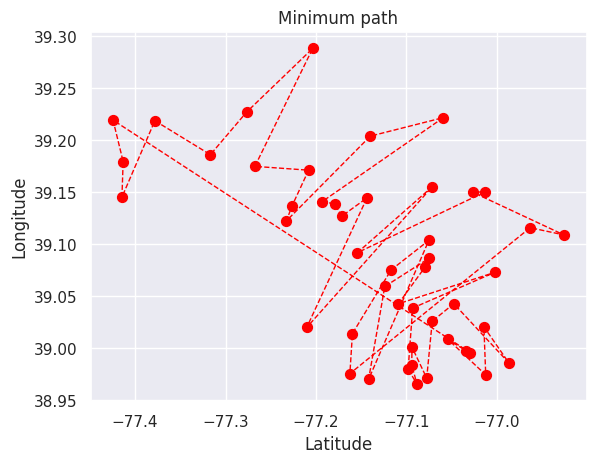

In [25]:
print("Minimum distance is: {}".format(min_distance))
plt.scatter(space[:, 0], space[:, 1], c='b', marker='o', s=50.0)
plt.plot(space[min_path, 0], space[min_path, 1], c='b', linewidth=1.0, linestyle='-')
plt.title("Minimum path")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()